In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"lusefar2004","key":"a516189a6b33025d5ba9c54257a98327"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle
!kaggle datasets download -d hassan06/nslkdd
!unzip nslkdd.zip


Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd
License(s): unknown
  0% 0.00/13.9M [00:00<?, ?B/s]
100% 13.9M/13.9M [00:00<00:00, 764MB/s]
Archive:  nslkdd.zip
  inflating: KDDTest+.arff           
  inflating: KDDTest+.txt            
  inflating: KDDTest-21.arff         
  inflating: KDDTest-21.txt          
  inflating: KDDTest1.jpg            
  inflating: KDDTrain+.arff          
  inflating: KDDTrain+.txt           
  inflating: KDDTrain+_20Percent.arff  
  inflating: KDDTrain+_20Percent.txt  
  inflating: KDDTrain1.jpg           
  inflating: index.html              
  inflating: nsl-kdd/KDDTest+.arff   
  inflating: nsl-kdd/KDDTest+.txt    
  inflating: nsl-kdd/KDDTest-21.arff  
  inflating: nsl-kdd/KDDTest-21.txt  
  inflating: nsl-kdd/KDDTest1.jpg    
  inflating: nsl-kdd/KDDTrain+.arff  
  inflating: nsl-kdd/KDDTrain+.txt   
  inflating: nsl-kdd/KDDTrain+_20Percent.arff  
  inflating: nsl-kdd/KDDTrain+_20Percent.txt  
  inflating: nsl-kdd/KDDTrain1.jpg   
  inf

In [ ]:
import pandas as pd

# Use predefined column names
columns = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
    'target'
]

# Load train and test datasets
train_df = pd.read_csv("KDDTrain+.txt", names=columns)
test_df = pd.read_csv("KDDTest+.txt", names=columns)

# Encode categorical features
categorical_cols = ['protocol_type', 'service', 'flag']

train_df = pd.get_dummies(train_df, columns=categorical_cols)
test_df = pd.get_dummies(test_df, columns=categorical_cols)

# Align test dataset columns with train dataset columns
missing_cols = set(train_df.columns) - set(test_df.columns)
for c in missing_cols:
    test_df[c] = 0
test_df = test_df[train_df.columns]

# Convert labels to binary: normal=0, attack=1
train_df['target'] = train_df['target'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['target'] = test_df['target'].apply(lambda x: 0 if x == 'normal' else 1)

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)


<ipython-input-6-d850a01d5d7d>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[c] = 0
<ipython-input-6-d850a01d5d7d>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[c] = 0
<ipython-input-6-d850a01d5d7d>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[c] = 0
<ipython-inpu

Train data shape: (125973, 3461)
Test data shape: (22544, 3461)


In [ ]:
# Ensure all data is numeric and no missing values
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)


In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
# Convert features to numeric and fill missing values
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Initialize and train model
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     22544

    accuracy                           1.00     22544
   macro avg       1.00      1.00      1.00     22544
weighted avg       1.00      1.00      1.00     22544



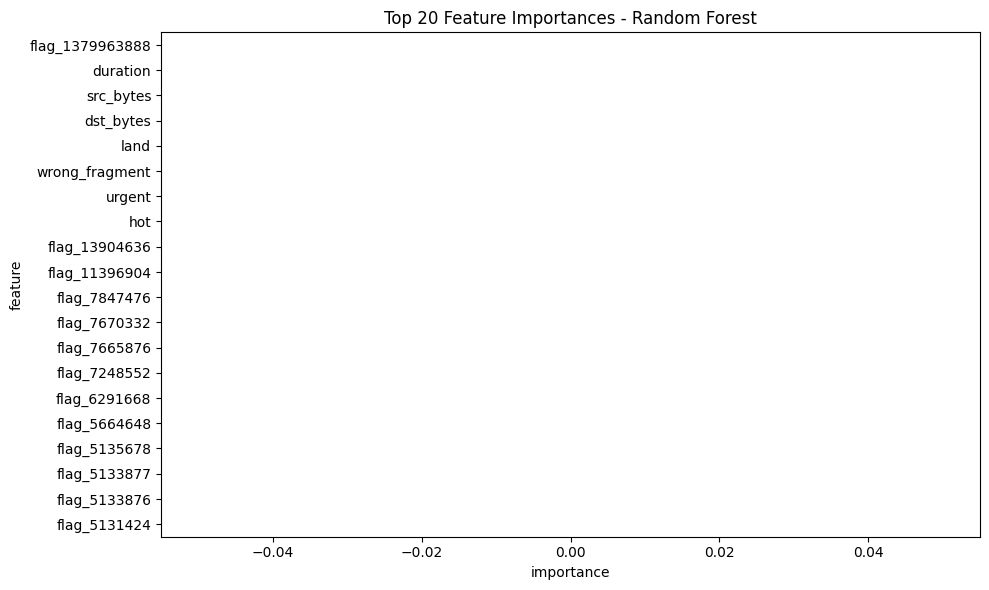

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
features = X_train.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({'feature': features, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp_df)
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


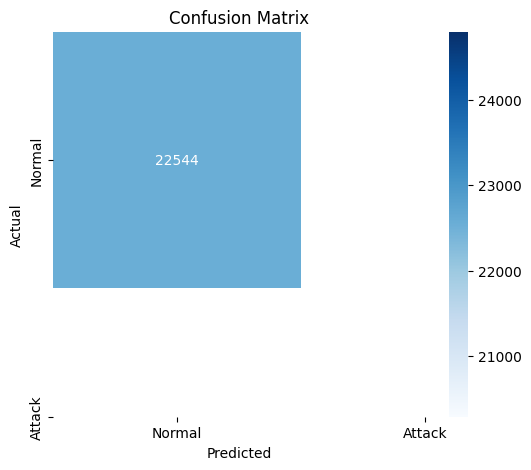

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal','Attack'], yticklabels=['Normal','Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_

# Evaluate best model
y_pred_best = best_model.predict(X_test)
print("Test Accuracy (Best RF):", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 1.0
Test Accuracy (Best RF): 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22544

    accuracy                           1.00     22544
   macro avg       1.00      1.00      1.00     22544
weighted avg       1.00      1.00      1.00     22544



In [ ]:
import joblib

# Save model
joblib.dump(best_model, 'rf_ai_nids_model.joblib')

# Later load model
loaded_model = joblib.load('rf_ai_nids_model.joblib')


In [ ]:
!kaggle datasets download -d hassan06/nslkdd


Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd
License(s): unknown
nslkdd.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
!kaggle datasets download -d hassan06/nslkdd
!unzip nslkdd.zip


Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd
License(s): unknown
nslkdd.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  nslkdd.zip
replace KDDTest+.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: KDDTest+.arff           
replace KDDTest+.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: KDDTest+.txt            
replace KDDTest-21.arff? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: KDDTest-21.arff         
replace KDDTest-21.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: KDDTest-21.txt          
  inflating: KDDTest1.jpg            
  inflating: KDDTrain+.arff          
  inflating: KDDTrain+.txt           
  inflating: KDDTrain+_20Percent.arff  
  inflating: KDDTrain+_20Percent.txt  
  inflating: KDDTrain1.jpg           
  inflating: index.html              
  inflating: nsl-kdd/KDDTest+.arff   
  inflating: nsl-kdd/KDDTest+.txt    
  inflating: nsl-kdd/KDDTest-21.arff  
  inflating: n

target
21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: count, dtype: int64
target
21    10694
18     2967
20     1343
15     1176
17     1168
19      890
14      736
16      681
13      519
12      486
11      461
7       249
10      195
6       157
8       131
0       123
3       116
9       106
5       103
4       101
1        87
2        55
Name: count, dtype: int64


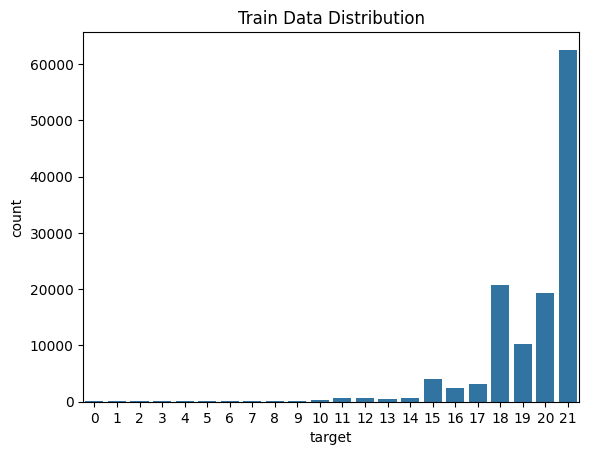

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (assuming you already have the train and test dfs)
train_df = pd.read_csv("KDDTrain+.txt", names=columns)
test_df = pd.read_csv("KDDTest+.txt", names=columns)

# Basic stats
print(train_df['target'].value_counts())
print(test_df['target'].value_counts())

# Plot distribution of normal vs attack
sns.countplot(x='target', data=train_df)
plt.title('Train Data Distribution')
plt.show()


              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22544

    accuracy                           1.00     22544
   macro avg       1.00      1.00      1.00     22544
weighted avg       1.00      1.00      1.00     22544



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


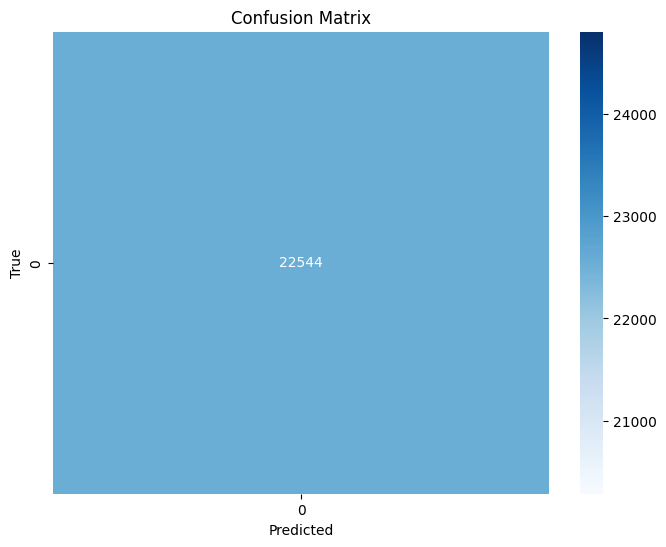

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


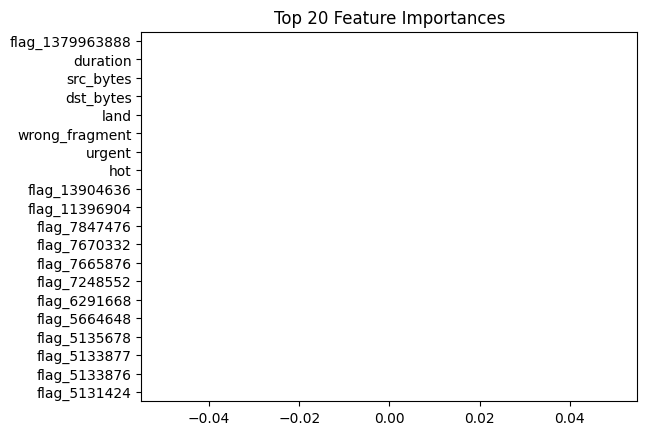

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot top 20 features
feat_imp[:20].plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.show()
